<a href="https://colab.research.google.com/github/UgyenDorji129/Classification-of-Micro-plastcis-from-the-water/blob/main/micro_plastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all the required Libary
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

In [ ]:
print("User Current Version:-", sys.version)

User Current Version:- 3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [ ]:
print("The Open CV version is: ", cv2.__version__)

The Open CV version is:  4.1.2


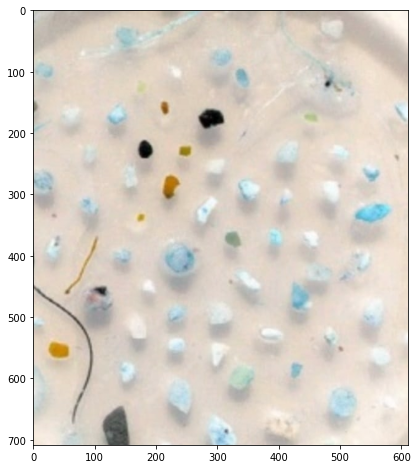

In [ ]:
#Reading the image
#@title Selecting the Image Sample {run: 'auto'}

path = "/content/sample 2.jpg" #@param ["/content/sample 1.jpg","/content/sample 2.jpg","/content/sample 3.jpg","/content/sample 4.jpg","/content/sample 5.jpg","/content/sample 6.jpg","/content/sample 7.jpg","/content/sample 8.jpg"]
image  = cv2.imread(path)
plt.figure(figsize=(8,8))
plt.imshow(image)

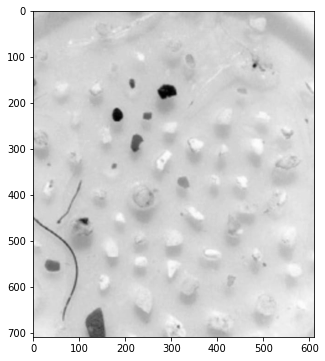

In [ ]:
#Converting the colored image into grey and setting blur
#@title Select Blur Level{run: 'auto'}
blurLevel = 9 #@param {type:"slider", min:1, max:9, step:2}
dst = cv2.GaussianBlur(image,(blurLevel,blurLevel),cv2.BORDER_DEFAULT)
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8,6))
plt.imshow(grey,cmap="gray")

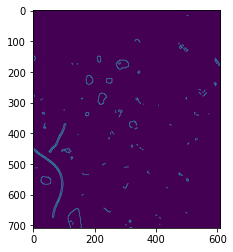

In [ ]:
#Detecting the image edges
#@title Create Blur Effect {run: 'auto'}
lowerThershold = 90 #@param {type: 'slider', min:10,max:250, step: 10 }
upperThershold = 110 #@param {type: 'slider', min:10,max:250, step: 10 }
canny = cv2.Canny(grey, lowerThershold,upperThershold,100, 3)
plt.imshow(canny)

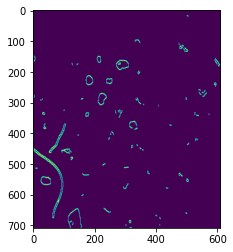

In [ ]:
#making the edges more thinker and visible
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated)

In [ ]:
#TO find the number of contours
(cnt, heirachy)  = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
 

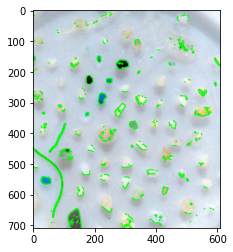

In [ ]:
# we have to convert BGR to RGB and then draw the image contours
rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt,-1 ,(0,255,0),2)
plt.imshow(rgb)

In [ ]:
#Circular
pallet = 0

#Unstructured 
fragment = 0

#line
fiber = 0

for  cn in cnt:  
  peri = cv2.arcLength(cn, True)
  approx = cv2.approxPolyDP(cn, 0.04 * peri, True)
  if(len(approx) == 2):
    fiber = fiber + 1
  elif(len(approx) == 8 ):
    pallet = pallet + 1
  else:
    fragment = fragment + 1


print("Number of fragment: ",fragment)
print("Number of fiber: ", fiber)
print("Number of pallet: ",pallet)


Number of fragment:  96
Number of fiber:  13
Number of pallet:  4


In [ ]:
#To print the number of micro-plastics: 
print("Total number of micor_plactics: ",len(cnt))

Total number of micor_plactics:  113


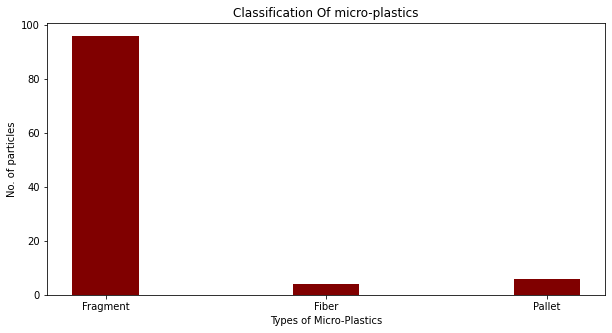

In [ ]:
#X-values
types = ["Fragment", "Fiber", "Pallet"]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types,[fragment,fiber,pallet], color ='maroon',
        width = 0.3)
 
plt.xlabel("Types of Micro-Plastics")
plt.ylabel("No. of particles")
plt.title("Classification Of micro-plastics")
plt.show()